# Titanic Survival Prediction (Classification Project)
   ## **Titanic Survival Prediction — using machine learning to predict whether a person survived or not.**
  

In [ ]:
# Load essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the Titanic dataset directly from a URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' because it has too many missing values
df.drop('Cabin', axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-762191991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-762191991.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Convert 'Sex' and 'Embarked' into numbers using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C = 0, Q = 1, S = 2


In [ ]:
# Choose features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[92 18]
 [18 51]]


In [ ]:
# Example input: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
# Let's say: 3rd class, female (0), 22 yrs old, alone, fare = 7.25, port S = 2

person = [[3, 0, 22, 0, 0, 7.25, 2]]
prediction = model.predict(person)

print("Prediction:", "Survived" if prediction[0] == 1 else "Did not survive")


Prediction: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# I already dropped this below commented one line
# Drop columns that are not useful for prediction
# df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# Encode categorical columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C = 0, Q = 1, S = 2




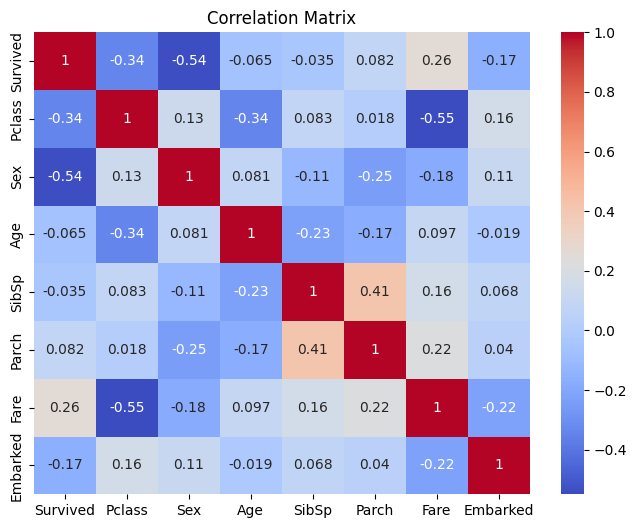

In [ ]:
# Correlation heatmap
# Shows which features affect each other. Higher correlation = more important for prediction.
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
